In [1]:
# Why: To make sure everything is working and load essential tools

import pandas as pd   # for data handling
import numpy as np    # for calculations
import matplotlib.pyplot as plt   # for charts

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [11]:
import zipfile, os

zip_path = "/Users/animchnlap314/Desktop/EDA_project /data/archive (2).zip"
extract_folder = "data"

os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

os.listdir(extract_folder)


['archive (2).zip', 'BMW sales data (2010-2024) (1).csv']

In [12]:
# Why: To load the dataset into pandas and get an overview

import pandas as pd
import os

# Replace the filename below with the actual one you saw inside 'data'
file_path = "data/BMW sales data (2010-2024) (1).csv"

df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print("Shape (rows, columns):", df.shape)

# Show first 5 rows
df.head()


✅ Data loaded successfully!
Shape (rows, columns): (50000, 11)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [13]:
# Why: To check data structure, types, and a quick info summary

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [16]:
# Why: To quickly understand numeric columns (like prices, mileage, etc.)

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,50000.0,2017.01570,4.324459,2010.0,2013.00,2017.0,2021.00,2024.0
Engine_Size_L,50000.0,3.24718,1.009078,1.5,2.40,3.2,4.10,5.0
Mileage_KM,50000.0,100307.20314,57941.509344,3.0,50178.00,100388.5,150630.25,199996.0
Price_USD,50000.0,75034.60090,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,5067.51468,2856.767125,100.0,2588.00,5087.0,7537.25,9999.0


In [26]:
# Why: To understand non-numeric columns (categories, colors, etc.)

for col in df.select_dtypes(include='object'):
    print(f"\n--- {col} ---")
    print(df[col].unique()[:10])  # show first 10 unique values



--- Model ---
['5 Series' 'i8' 'X3' '7 Series' 'M5' '3 Series' 'X1' 'M3' 'X5' 'i3']

--- Region ---
['Asia' 'North America' 'Middle East' 'South America' 'Europe' 'Africa']

--- Color ---
['Red' 'Blue' 'Black' 'Silver' 'White' 'Grey']

--- Fuel_Type ---
['Petrol' 'Hybrid' 'Diesel' 'Electric']

--- Transmission ---
['Manual' 'Automatic']

--- Sales_Classification ---
['High' 'Low']


In [27]:
# WHY: Check for duplicate rows and outlier counts

# 1️⃣ Duplicates
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)

# 2️⃣ Outliers using IQR method
numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # Interquartile range
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {len(outliers)} outliers ({round(len(outliers)/len(df)*100, 2)}%)")


Total duplicate rows: 0
Year: 0 outliers (0.0%)
Engine_Size_L: 0 outliers (0.0%)
Mileage_KM: 0 outliers (0.0%)
Price_USD: 0 outliers (0.0%)
Sales_Volume: 0 outliers (0.0%)


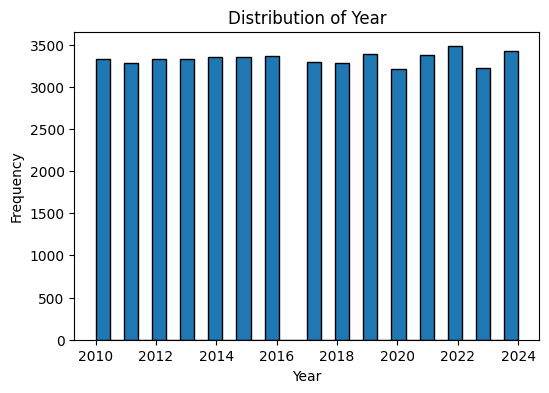

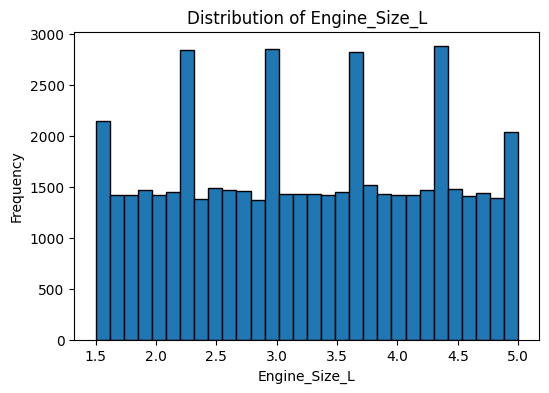

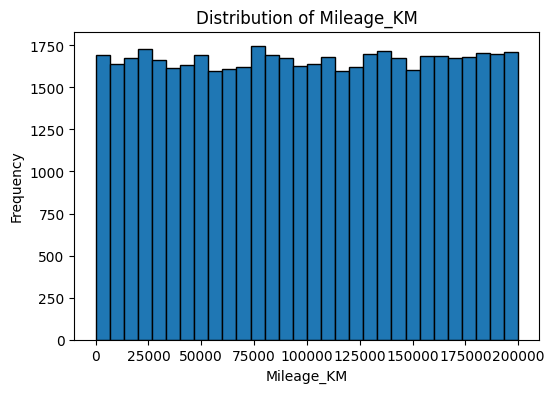

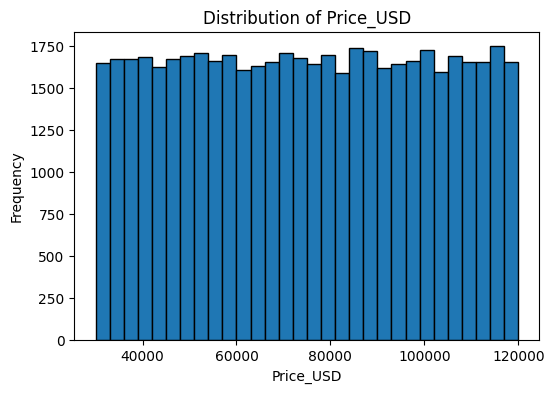

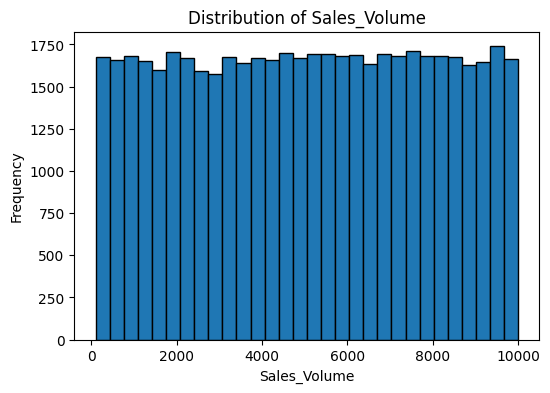

In [28]:
# WHY: To understand how each numeric column is distributed
import matplotlib.pyplot as plt

numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


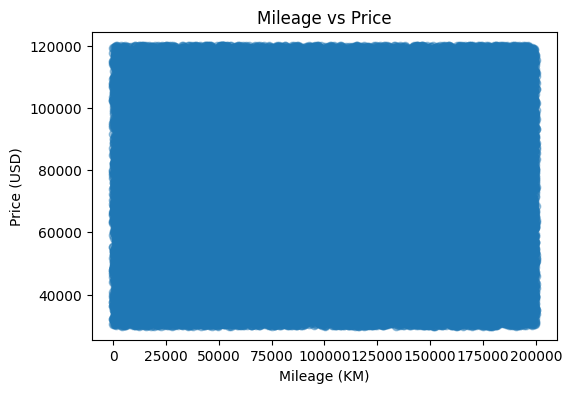

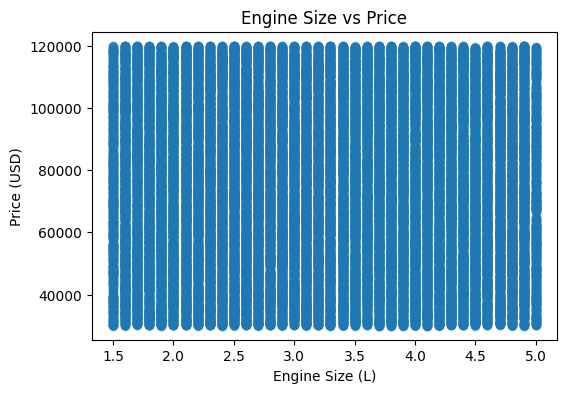

In [29]:
# WHY: To see if two numeric features have linear or nonlinear relationships

plt.figure(figsize=(6, 4))
plt.scatter(df['Mileage_KM'], df['Price_USD'], alpha=0.4)
plt.title("Mileage vs Price")
plt.xlabel("Mileage (KM)")
plt.ylabel("Price (USD)")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(df['Engine_Size_L'], df['Price_USD'], alpha=0.4)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (USD)")
plt.show()


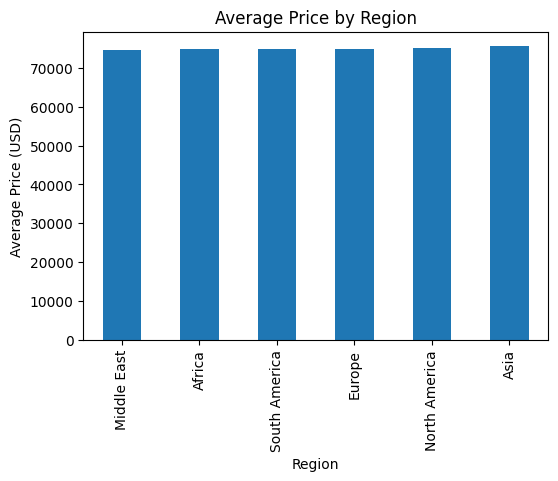

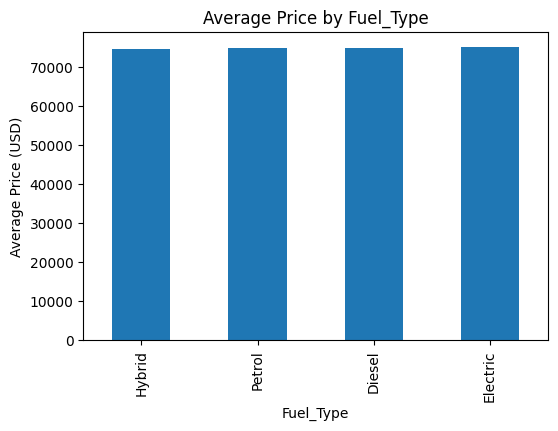

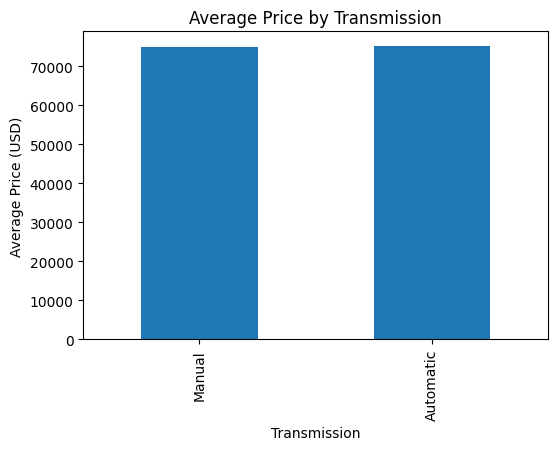

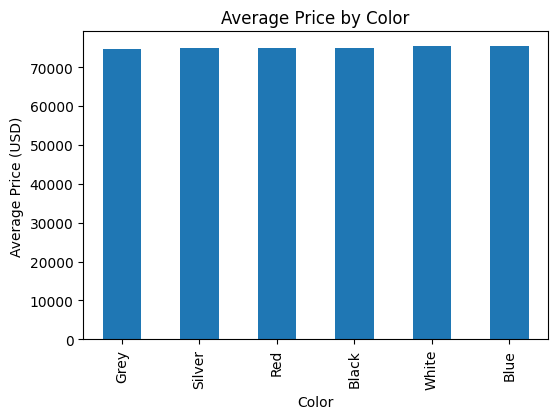

In [30]:
# WHY: To compare average Price and Sales_Volume across categories

category_cols = ['Region', 'Fuel_Type', 'Transmission', 'Color']

for col in category_cols:
    plt.figure(figsize=(6, 4))
    df.groupby(col)['Price_USD'].mean().sort_values().plot(kind='bar')
    plt.title(f"Average Price by {col}")
    plt.ylabel("Average Price (USD)")
    plt.xlabel(col)
    plt.show()


In [31]:
# WHY: To see how numeric columns are related
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
Year,1.000000,-0.001944,0.008741,0.003547,0.001671
Engine_Size_L,-0.001944,1.000000,-0.004906,0.000146,-0.003942
Mileage_KM,0.008741,-0.004906,1.000000,-0.004238,0.001434
Price_USD,0.003547,0.000146,-0.004238,1.000000,0.000080
Sales_Volume,0.001671,-0.003942,0.001434,0.000080,1.000000


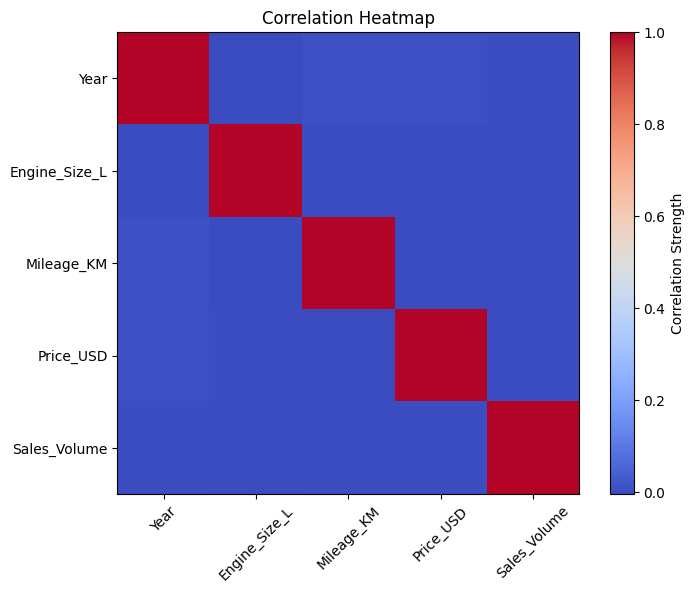

In [32]:
# WHY: To make correlation patterns easier to spot visually
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Strength')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


Intercept (β₀): 75022.37188822629
Slope (β₁): 3.766040617926605
R² score: 2.1366413194279232e-08


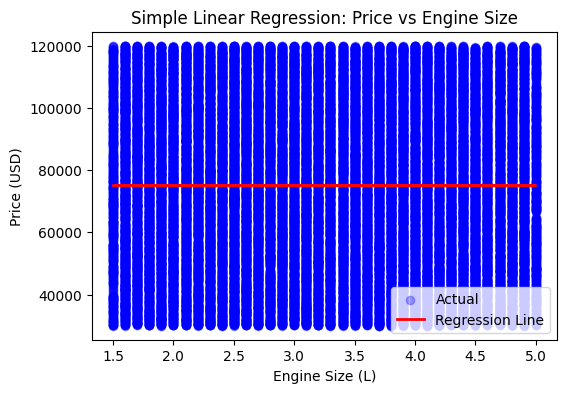

In [36]:
# WHY: To see if Engine Size affects Price and to visualize the regression line

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X = df[['Engine_Size_L']]   # predictor
y = df['Price_USD']         # target

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Coefficients
print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])
print("R² score:", model.score(X, y))

# Visualize
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='blue', alpha=0.3, label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Simple Linear Regression: Price vs Engine Size")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [34]:
import sklearn
print("scikit-learn installed successfully!", sklearn.__version__)


scikit-learn installed successfully! 1.7.2


In [35]:
from sklearn.linear_model import LinearRegression
